In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/content/drive/MyDrive/Final_DataSet/Train'
valid_path = r'/content/drive/MyDrive/Final_DataSet/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob(r'/content/drive/MyDrive/Final_DataSet/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model_vgg16_final = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model_vgg16_final.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8145 images belonging to 19 classes.
Found 2010 images belonging to 19 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history_vgg16_final = model_vgg16_final.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model_vgg16_final.save('vgg16_final_model.h5')
print("model saved to Disk.")

Epoch 1/10
255/255 [==============================] - 3897s 15s/step - loss: 0.8300 - accuracy: 0.7494 - val_loss: 0.4543 - val_accuracy: 0.8502
Epoch 2/10
255/255 [==============================] - 186s 728ms/step - loss: 0.3737 - accuracy: 0.8765 - val_loss: 0.3836 - val_accuracy: 0.8811
Epoch 3/10
255/255 [==============================] - 185s 725ms/step - loss: 0.2604 - accuracy: 0.9191 - val_loss: 0.4085 - val_accuracy: 0.8761
Epoch 4/10
255/255 [==============================] - 186s 728ms/step - loss: 0.2610 - accuracy: 0.9241 - val_loss: 0.3634 - val_accuracy: 0.9000
Epoch 5/10
255/255 [==============================] - 185s 725ms/step - loss: 0.2084 - accuracy: 0.9328 - val_loss: 0.3474 - val_accuracy: 0.9109
Epoch 6/10
255/255 [==============================] - 183s 718ms/step - loss: 0.1714 - accuracy: 0.9484 - val_loss: 0.3152 - val_accuracy: 0.9199
Epoch 7/10
255/255 [==============================] - 184s 720ms/step - loss: 0.1636 - accuracy: 0.9475 - val_loss: 0.2800 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


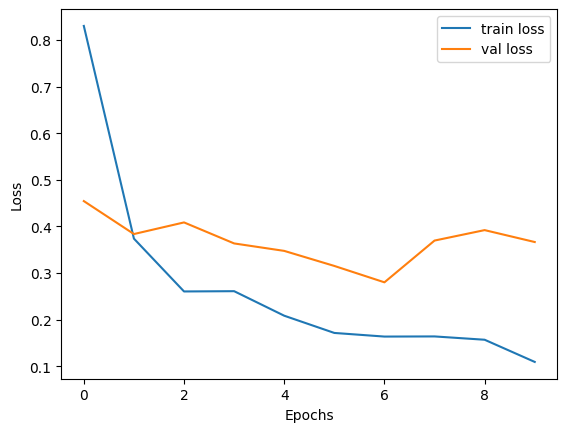

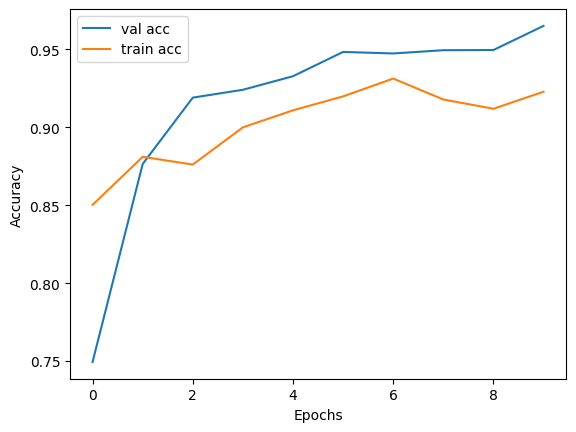

In [ ]:
#plot the loss
plt.plot(history_vgg16_final.history['loss'], label='train loss')
plt.plot(history_vgg16_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_vgg16_final.history['accuracy'], label='val acc')
plt.plot(history_vgg16_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# dirname = os.path.join(os.path.dirname(__file__))
model_vgg16_new_final = load_model('vgg16_final_model.h5')
print("model loaded.")

model loaded.


In [ ]:
model_vgg16_new_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 2010 images belonging to 19 classes.


In [ ]:
predictions = model_vgg16_new_final.predict(test_data_generator, steps=test_steps_per_epoch)


63/63 [==============================] - 19s 301ms/step


In [ ]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0 ... 18 18 18]
[ 0  0 14 ... 18 18 18]


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                        precision    recall  f1-score   support

          Apple_blotch       0.79      0.64      0.71        64
         Apple_healthy       0.88      0.90      0.89       137
          Apple_rotten       0.95      0.93      0.94       136
            Apple_scab       1.00      0.95      0.98        42
           Banana_firm       0.97      0.98      0.98       148
 Banana_heavilybruised       0.94      0.92      0.93       136
Banana_slightlybruised       0.91      0.94      0.93       159
   GreenChilli_damaged       1.00      1.00      1.00        27
     GreenChilli_dried       0.99      0.94      0.96       100
       GreenChilli_old       0.83      0.94      0.88        52
      GreenChilli_ripe       0.69      0.88      0.77        40
    GreenChilli_unripe       0.93      0.62      0.75        45
       Orange_greening       1.00      0.81      0.89       136
        Orange_healthy       0.86      0.94      0.90        71
         Orange_rotten       0.88      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


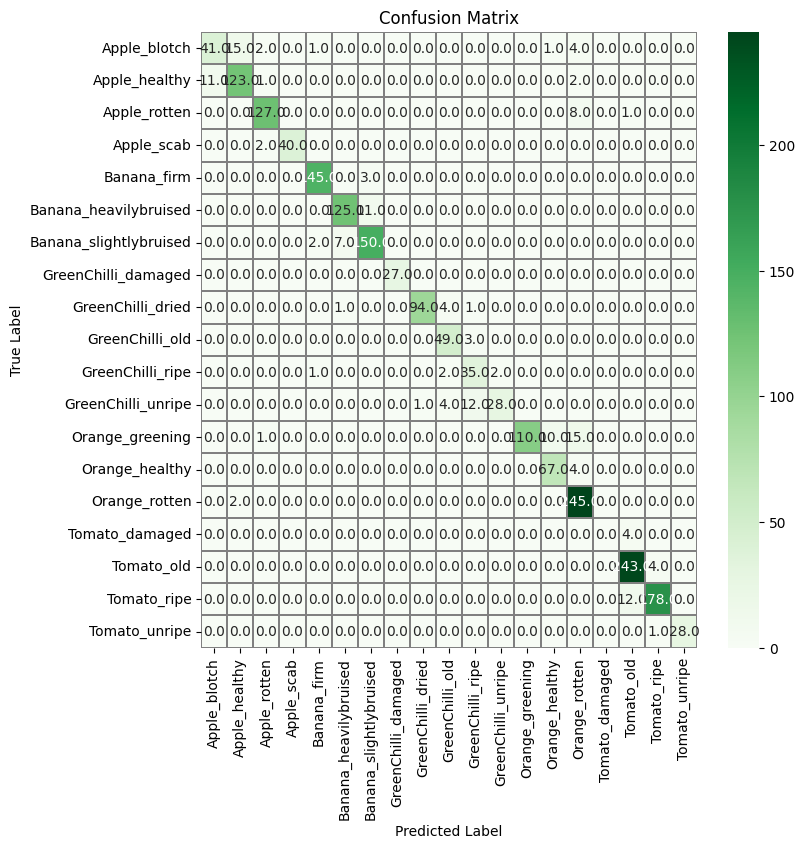

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Apple_blotch','Apple_healthy','Apple_rotten','Apple_scab','Banana_firm','Banana_heavilybruised','Banana_slightlybruised','GreenChilli_damaged','GreenChilli_dried','GreenChilli_old','GreenChilli_ripe','GreenChilli_unripe','Orange_greening','Orange_healthy','Orange_rotten','Tomato_damaged','Tomato_old','Tomato_ripe','Tomato_unripe'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Apple_blotch','Apple_healthy','Apple_rotten','Apple_scab','Banana_firm','Banana_heavilybruised','Banana_slightlybruised','GreenChilli_damaged','GreenChilli_dried','GreenChilli_old','GreenChilli_ripe','GreenChilli_unripe','Orange_greening','Orange_healthy','Orange_rotten','Tomato_damaged','Tomato_old','Tomato_ripe','Tomato_unripe'])

plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [ ]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Apple_blotch','Apple_healthy','Apple_rotten','Apple_scab','Banana_firm','Banana_heavilybruised','Banana_slightlybruised','GreenChilli_damaged','GreenChilli_dried','GreenChilli_old','GreenChilli_ripe','GreenChilli_unripe','Orange_greening','Orange_healthy','Orange_rotten','Tomato_damaged','Tomato_old','Tomato_ripe','Tomato_unripe']
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Apple_blotch,0.640625,0.359375,0.005653,0.994347
Apple_healthy,0.897810,0.102190,0.009076,0.990924
Apple_rotten,0.933824,0.066176,0.003202,0.996798
Apple_scab,0.952381,0.047619,0.000000,1.000000
Banana_firm,0.979730,0.020270,0.002148,0.997852
Banana_heavilybruised,0.919118,0.080882,0.004269,0.995731
Banana_slightlybruised,0.943396,0.056604,0.007563,0.992437
GreenChilli_damaged,1.000000,0.000000,0.000000,1.000000
GreenChilli_dried,0.940000,0.060000,0.000524,0.999476


In [ ]:
print("VGG16 analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

VGG16 analysis: 
TPR average:  0.8566824509691521
FPR average:  0.004392779327368899
TNR average:  0.9956072206726313
FNR average:  0.1433175490308478
